In [41]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [42]:
df=pd.read_csv('data.csv')
df.head(7)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No


In [43]:
#drop the id column
df.drop('customerID',axis='columns',inplace=True) #inplace =true ==> the column will be droped and the dataframe will be updated also
df.head(7)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No


In [44]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [45]:
# TotalCharges have some null row so we should drop these rows
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [46]:
df=df[df.TotalCharges != ' ']
df.TotalCharges=pd.to_numeric(df.TotalCharges)

In [47]:
#check the result
df.TotalCharges.dtypes

dtype('float64')

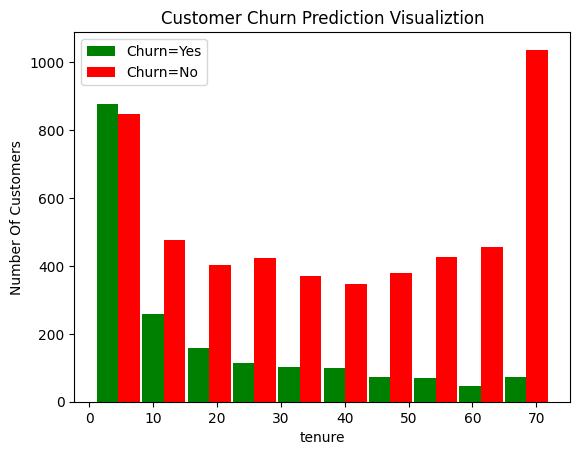

In [48]:
#data visualisation
tenure_churn_no = df[df.Churn=='No'].tenure
tenure_churn_yes = df[df.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

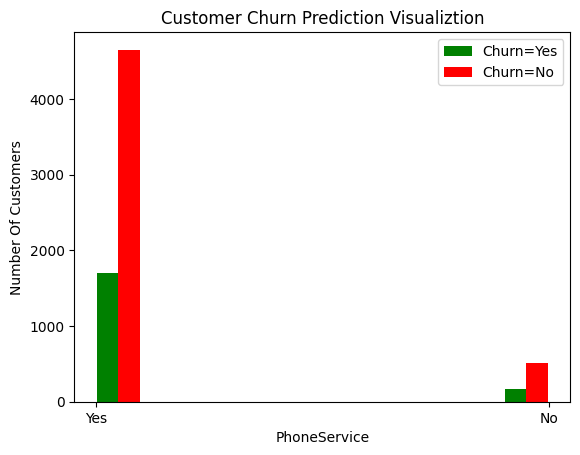

In [49]:

PhoneService_churn_no = df[df.Churn=='No'].PhoneService
PhoneService_churn_yes = df[df.Churn=='Yes'].PhoneService

plt.xlabel("PhoneService")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([PhoneService_churn_yes, PhoneService_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [50]:
for c in df.columns:
  if(df[c].dtypes == 'object'):
    print(c +" ", df[c].unique())


gender  ['Female' 'Male']
Partner  ['Yes' 'No']
Dependents  ['No' 'Yes']
PhoneService  ['No' 'Yes']
MultipleLines  ['No phone service' 'No' 'Yes']
InternetService  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  ['No' 'Yes' 'No internet service']
OnlineBackup  ['Yes' 'No' 'No internet service']
DeviceProtection  ['No' 'Yes' 'No internet service']
TechSupport  ['No' 'Yes' 'No internet service']
StreamingTV  ['No' 'Yes' 'No internet service']
StreamingMovies  ['No' 'Yes' 'No internet service']
Contract  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  ['Yes' 'No']
PaymentMethod  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  ['No' 'Yes']


In [51]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [52]:
for c in df.columns:
  if(df[c].dtypes == 'object'):
    print(c +" ", df[c].unique())

gender  ['Female' 'Male']
Partner  ['Yes' 'No']
Dependents  ['No' 'Yes']
PhoneService  ['No' 'Yes']
MultipleLines  ['No' 'Yes']
InternetService  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  ['No' 'Yes']
OnlineBackup  ['Yes' 'No']
DeviceProtection  ['No' 'Yes']
TechSupport  ['No' 'Yes']
StreamingTV  ['No' 'Yes']
StreamingMovies  ['No' 'Yes']
Contract  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  ['Yes' 'No']
PaymentMethod  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  ['No' 'Yes']


In [53]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [54]:

for c in df.columns:
    print(c +" ", df[c].unique())

gender  ['Female' 'Male']
SeniorCitizen  [0 1]
Partner  [1 0]
Dependents  [0 1]
tenure  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService  [0 1]
MultipleLines  [0 1]
InternetService  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  [0 1]
OnlineBackup  [1 0]
DeviceProtection  [0 1]
TechSupport  [0 1]
StreamingTV  [0 1]
StreamingMovies  [0 1]
Contract  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  [1 0]
PaymentMethod  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges  [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn  [0 1]


In [55]:

df['gender'].replace({'Female':0,'Male':1},inplace=True)

In [56]:
df['gender'].unique()

array([0, 1])

In [57]:
#this will create a column for each value of the given features for example :
#InternetService  ['DSL' 'Fiber optic' 'No'] ==> 3 columns ==>  DSL + Fiber optic + No
df = pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'])

In [58]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [59]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5,0,0,0,0,8,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
6,1,0,0,1,22,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
7,0,0,0,0,10,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
8,0,0,1,0,28,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
9,1,0,0,1,62,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0


In [60]:
#lets scaale our dataset
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [61]:
#and quick check
for c in df.columns:
    print(c +" ", df[c].unique())

gender  [0 1]
SeniorCitizen  [0 1]
Partner  [1 0]
Dependents  [0 1]
tenure  [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService  [0 1]
MultipleLines  [0 1]
OnlineSecurity  [0 1]
OnlineBackup  [1 0]
DeviceProtection  [0 1]
TechSupport  [

In [62]:
#test train spliting
X = df.drop('Churn',axis='columns')
y = df['Churn']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [63]:
print (X_train.shape)
print (X_test.shape)

(5625, 26)
(1407, 26)


In [66]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])



model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.4965 - accuracy: 0.7554
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4272 - accuracy: 0.7995
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4202 - accuracy: 0.8018
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4159 - accuracy: 0.8039
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4131 - accuracy: 0.8053
Epoch 6/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4110 - accuracy: 0.8092
Epoch 7/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4097 - accuracy: 0.8089
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4073 - accuracy: 0.8091
Epoch 9/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4061 - accuracy: 0.8114
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4046 - accura

In [67]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x79764dcc2680>>

In [68]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.5061 - accuracy: 0.7726


[0.5061321258544922, 0.7725657224655151]

In [69]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 2ms/step


array([[1.3403511e-01],
       [3.6596626e-01],
       [2.3899568e-04],
       [6.5893030e-01],
       [4.6211305e-01]], dtype=float32)

In [70]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [71]:
y_pred

[0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,


In [72]:
y_test

2660    0
744     0
5579    1
64      1
3287    1
       ..
2024    0
4396    1
4081    1
1297    0
4899    1
Name: Churn, Length: 1407, dtype: int64

In [73]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       999
           1       0.65      0.46      0.54       408

    accuracy                           0.77      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.76      0.77      0.76      1407



Text(95.72222222222221, 0.5, 'Truth')

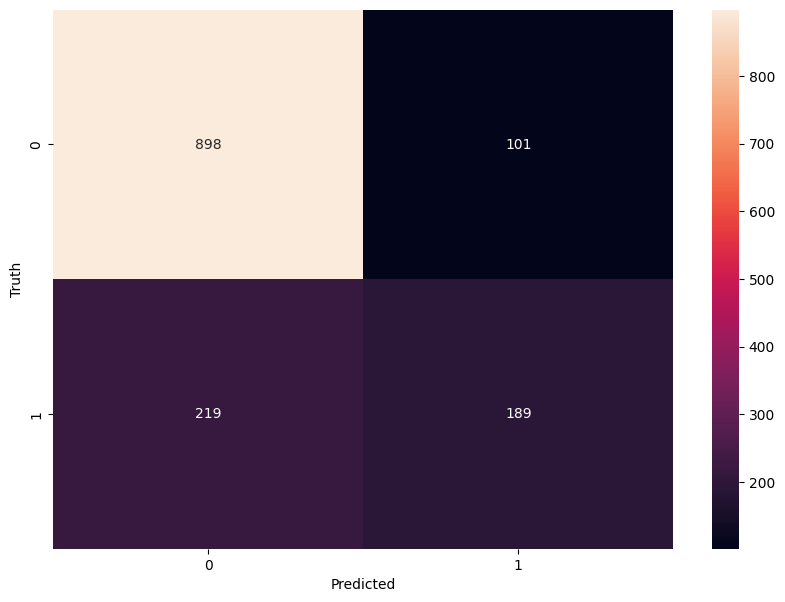

In [74]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')